In [178]:
import numpy as np
import pandas as pd
import math


In [179]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [180]:
df = pd.read_csv("Iris.csv")

In [181]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


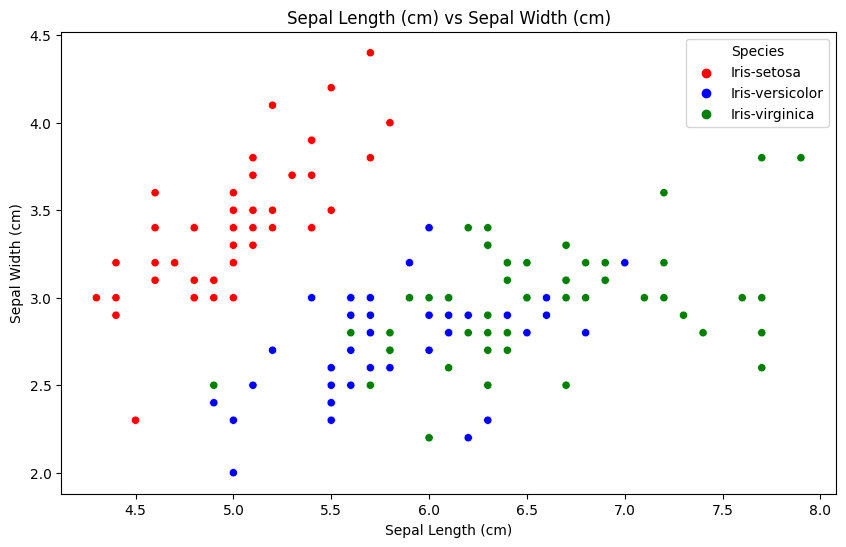

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
species_palette = {'Iris-setosa':'red','Iris-versicolor' : 'blue','Iris-virginica' : 'green'}
df['color'] = df['Species'].map(species_palette)
plt.figure(figsize = (10, 6))
sns.scatterplot( data = df,x ='SepalLengthCm',y ='SepalWidthCm', hue = 'Species', palette=species_palette)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Sepal Length (cm) vs Sepal Width (cm)")
plt.show()


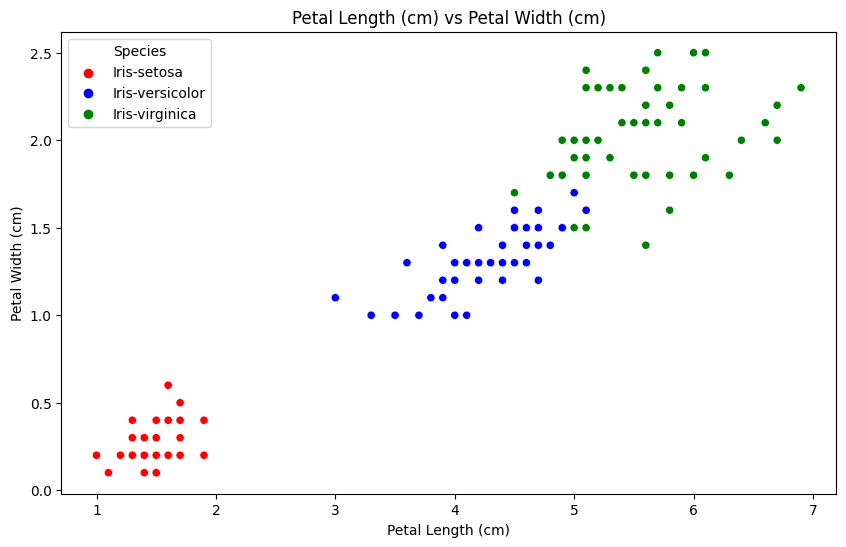

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
species_palette = {'Iris-setosa':'red','Iris-versicolor' : 'blue','Iris-virginica' : 'green'}
df['color'] = df['Species'].map(species_palette)
plt.figure(figsize = (10, 6))
sns.scatterplot( data = df,x ='PetalLengthCm',y ='PetalWidthCm', hue = 'Species', palette=species_palette)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title("Petal Length (cm) vs Petal Width (cm)")
plt.show()


by scratch :

In [201]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have dropped the 'color' column
df = df.drop('color', axis=1)
data_array = df.values

def train_test_split_random(data, split_ratio=0.7):
    train_data, test_data = train_test_split(data, test_size=(1 - split_ratio), random_state=48)
    return train_data, test_data

train_data, test_data = train_test_split_random(data_array, split_ratio=0.7)


In [202]:

def euclidean_distance(d1,d2,length):
  distance = 0
  for x in range(length):
    distance +=(d1[x] - d2[x])**2
  return distance**0.5

In [203]:

#from scratch
import operator
def knn(train_set, test_set, k):
  distance = []

  if isinstance(train_set, pd.DataFrame):
        train_set = train_set.values
        test_set = test_set if isinstance(test_set, np.ndarray) else test_set.values


#calculated euclidean distance between each data point in train set and test set
  for i in range(len(train_set)):
      dist = euclidean_distance(test_set[:-1], train_set[i][:-1],len(train_set[0]) - 1)
      distance.append((i, dist))

#sort the distance in ascending order
  sorted_d = sorted(distance,key = operator.itemgetter(1))
  neighbours = []
#get index of nearest neighbours
  for x in range(k):
    neighbours.append(sorted_d[x][0])
#count the votes for each class for among the k nearest neighbours
  classvotes = {}
  for x in neighbours:
    response = train_set[x][-1]
    if response in classvotes:
      classvotes[response] += 1
    else:
      classvotes[response] = 1
#sort the class votes in descending order
  sortedvotes = sorted(classvotes.items(),key=operator.itemgetter(1),reverse = True)
#return class with highest vote count and the indices of the neighbours
  return sortedvotes[0][0]


In [204]:
def accuracy_calc(test_set,predictions):
  correct = 0
  for i in range(len(test_set)):
    if test_set[i][-1] == predictions[i]:
      correct += 1
  accuracy = correct / float(len(test_set)) * 100.0
  return accuracy

In [205]:
accuracy_list = []
for k in range(1,100):
  predictions = []
  for i in range(len(test_data)):
    predicted_class = knn(train_data,test_data[i],k = k)
    predictions.append(predicted_class)
  accuracy = accuracy_calc(test_data,predictions)
  accuracy_list.append(accuracy)

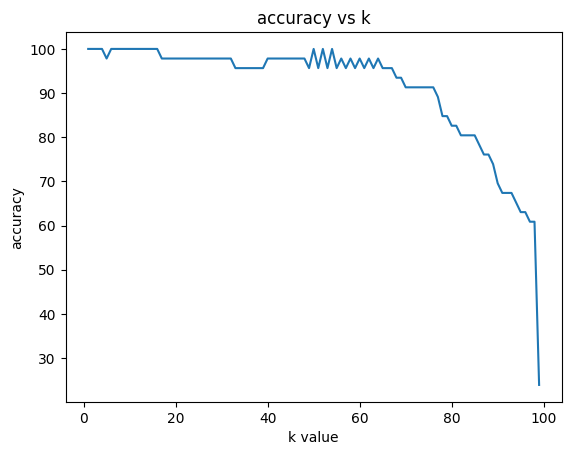

In [206]:
k_values_1 = list(range(1,100))
plt.plot(k_values_1,accuracy_list)
plt.title('accuracy vs k')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

by using sklearn:

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('Species', axis = 1)
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

accuracies = []
for k in range(1,100):
 knn_model = KNeighborsClassifier(n_neighbors = k)
 knn_model.fit(X_train,y_train)
 y_pred = knn_model.predict(X_test)
 accuracy = accuracy_score(y_test,y_pred)
 accuracies.append(accuracy)



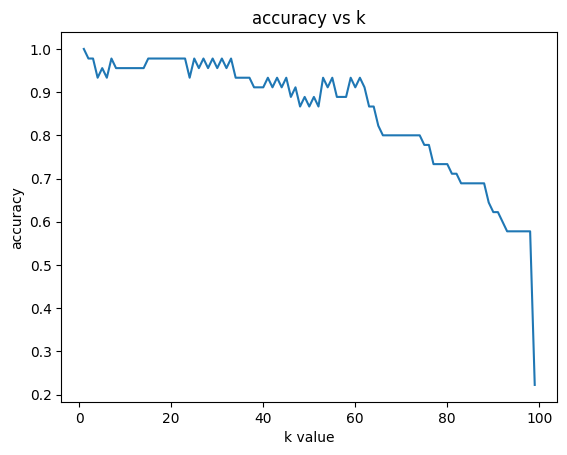

In [208]:
k_values = list(range(1,100))
plt.plot(k_values,accuracies)
plt.title('accuracy vs k')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()